In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import matplotlib
import seaborn as sns
import bokeh.plotting as bk
import bokeh.io as outbk
from scipy.stats import ks_2samp

In [3]:
outbk.output_notebook() #Intégration des graphiques bokeh dans le notebook

Loading BokehJS ...

In [4]:
sys.path.append('../code')

In [5]:
import my_functions_revue_1_0 as mfct

In [6]:
data = pd.read_csv('../fichiers_csv/world_income_distribution.csv')

# Vérification de la présence de valeurs manquantes

In [7]:
mfct.verif_presence_nan_in_df(data,'data')

Présence de valeurs manquante dans data


In [8]:
indices_valeurs_manquantes = np.asarray(data.isnull()).nonzero()
indices_valeurs_manquantes

(array([ 5884,  5885,  5886,  5887,  5888,  5889,  5890,  5891,  5892,
         5893,  5894,  5895,  5896,  5897,  5898,  5899,  5900,  5901,
         5902,  5903,  5904,  5905,  5906,  5907,  5908,  5909,  5910,
         5911,  5912,  5913,  5914,  5915,  5916,  5917,  5918,  5919,
         5920,  5921,  5922,  5923,  5924,  5925,  5926,  5927,  5928,
         5929,  5930,  5931,  5932,  5933,  5934,  5935,  5936,  5937,
         5938,  5939,  5940,  5941,  5942,  5943,  5944,  5945,  5946,
         5947,  5948,  5949,  5950,  5951,  5952,  5953,  5954,  5955,
         5956,  5957,  5958,  5959,  5960,  5961,  5962,  5963,  5964,
         5965,  5966,  5967,  5968,  5969,  5970,  5971,  5972,  5973,
         5974,  5975,  5976,  5977,  5978,  5979,  5980,  5981,  5982,
         5983, 11337, 11338, 11339, 11340, 11341, 11342, 11343, 11344,
        11345, 11346, 11347, 11348, 11349, 11350, 11351, 11352, 11353,
        11354, 11355, 11356, 11357, 11358, 11359, 11360, 11361, 11362,
      

In [9]:
data.iloc[5883:5984,0:7]

,country,year_survey,quantile,nb_quantiles,income,pop,gdpppp
5883,KOR,2008,100,100,76620.18000,0.48607,19162.0
5884,XKX,2008,1,100,437.89370,0.02000,NaN
5885,XKX,2008,2,100,508.17133,0.02000,NaN
5886,XKX,2008,3,100,591.82820,0.02000,NaN
5887,XKX,2008,4,100,668.00000,0.02000,NaN
5888,XKX,2008,5,100,730.40220,0.02000,NaN
5889,XKX,2008,6,100,763.90980,0.02000,NaN
5890,XKX,2008,7,100,803.13160,0.02000,NaN
5891,XKX,2008,8,100,838.51465,0.02000,NaN
5892,XKX,2008,9,100,874.04150,0.02000,NaN


In [10]:
data.iloc[11337:11437,0:7]

,country,year_survey,quantile,nb_quantiles,income,pop,gdpppp
11337,PSE,2009,1,100,195.28990,0.04,NaN
11338,PSE,2009,2,100,264.36533,0.04,NaN
11339,PSE,2009,3,100,301.44672,0.04,NaN
11340,PSE,2009,4,100,329.83392,0.04,NaN
11341,PSE,2009,5,100,348.76495,0.04,NaN
11342,PSE,2009,6,100,366.71080,0.04,NaN
11343,PSE,2009,7,100,379.31920,0.04,NaN
11344,PSE,2009,8,100,392.63140,0.04,NaN
11345,PSE,2009,9,100,411.02994,0.04,NaN
11346,PSE,2009,10,100,425.45926,0.04,NaN


GDP PPP :  gross domestic product based on purchasing power parity
XKX : Kosovo
PSE : Palestine

In [11]:
#www.dnb.com/content/.../iso_3digit_alpha_country_codes.xls
code_pays = pd.read_csv('../fichiers_csv/code_pays.csv')
code_pays.columns = ['country','country_name']
code_pays.head()

,country,country_name
0,AFG,Afghanistan
1,ALA,Aland Islands
2,ALB,Albania
3,DZA,Algeria
4,ASM,American Samoa


In [12]:
data_avec_nom_pays = pd.merge(data,code_pays, how='outer')
data_avec_nom_pays.shape

(11863, 8)

# Vérification de la presence de doublons

In [13]:
mfct.verif_doublon(data,'data')

Absence de doublon, il n'y a pas de retraitement à faire pour data


# Vérification de la présence de valeurs aberrantes

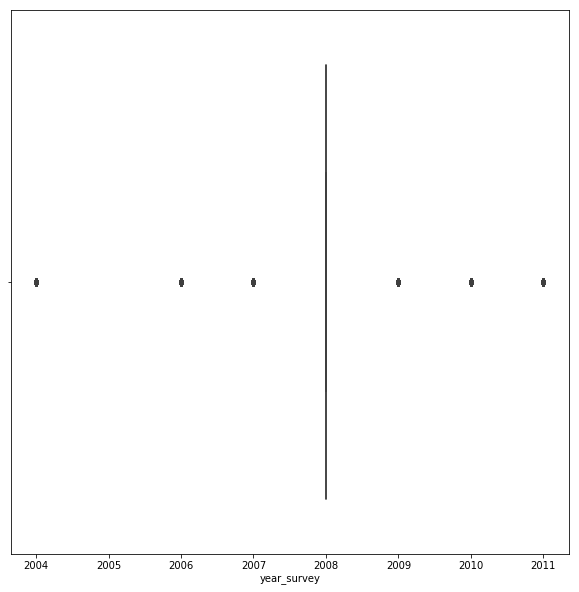

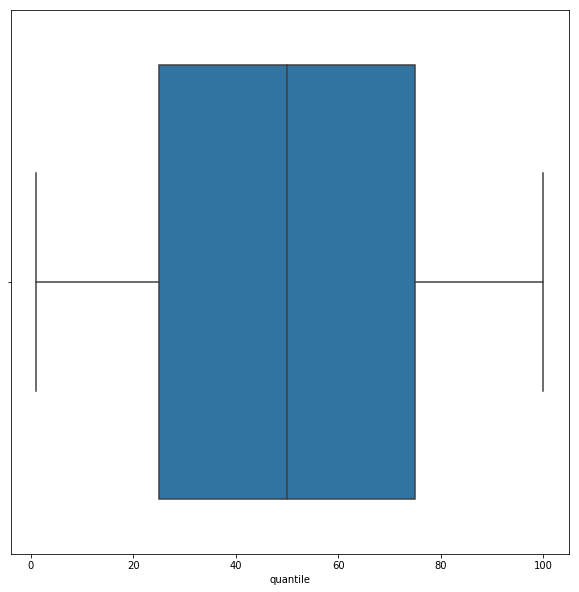

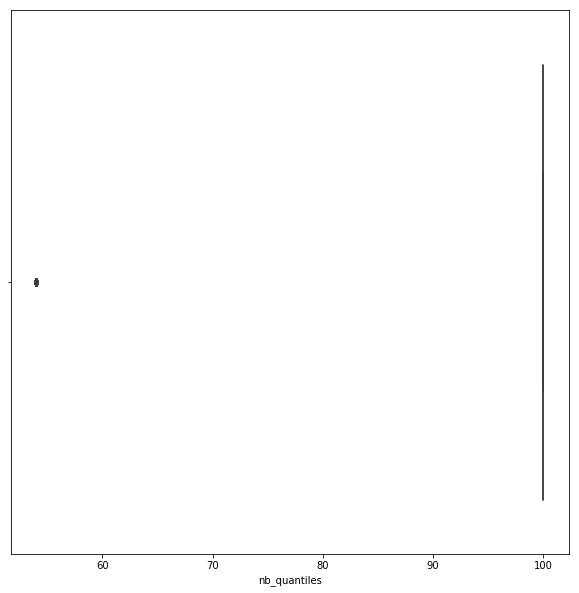

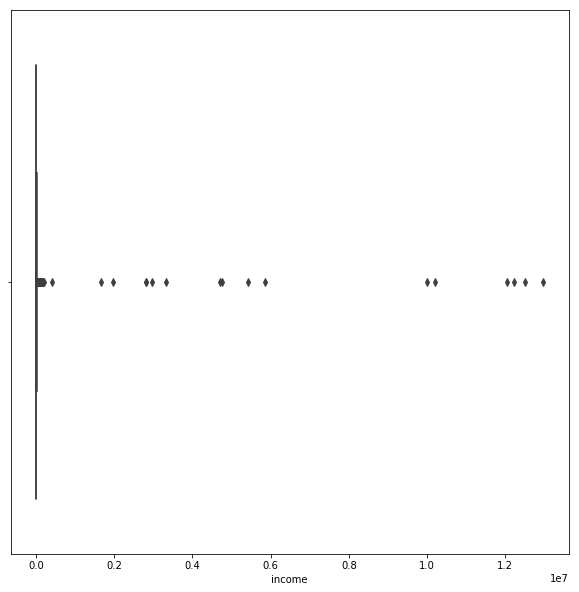

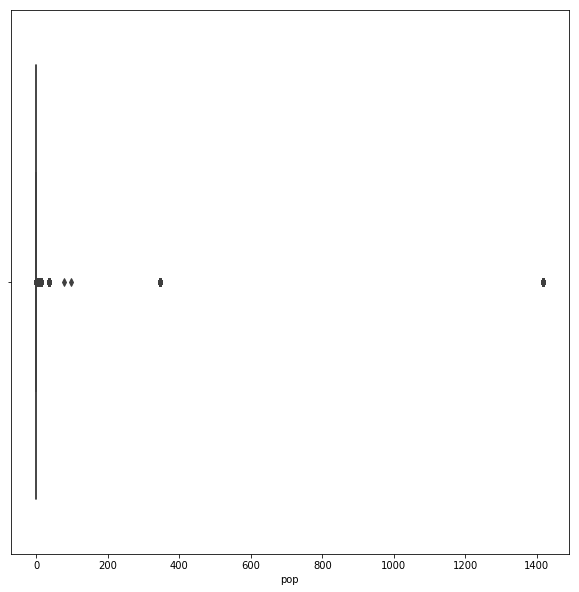

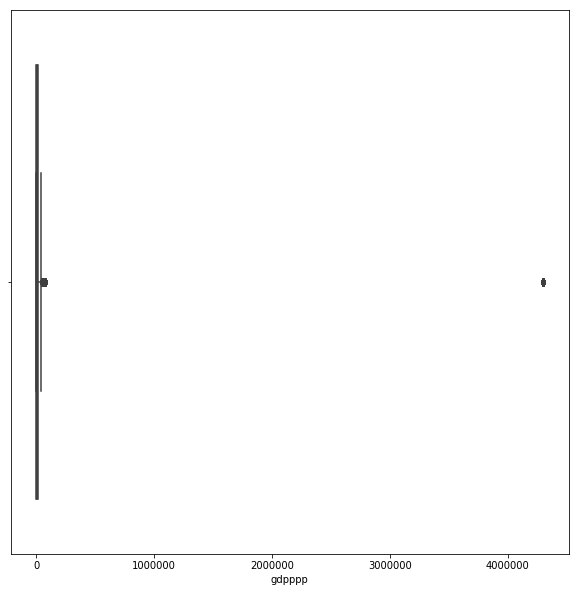

In [14]:
for variable in data.columns:
    
    if (data[variable].dtype == 'int64') or (data[variable].dtype == 'float64'):
        plt.figure(figsize=(10,10))
        plt.subplot()
        sns.boxplot(data[variable])


### Analyse des valeurs aberantes de la variable pop

In [15]:
a = data.groupby(['country','year_survey','pop']).count()
a


,,,quantile,nb_quantiles,income,gdpppp
country,year_survey,pop,,,,
ALB,2008,0.031430,100,100,100,100
ARG,2008,0.398761,100,100,100,100
ARM,2008,0.030700,100,100,100,100
AUT,2008,0.083200,100,100,100,100
AZE,2008,0.086788,100,100,100,100
BEL,2008,0.106300,100,100,100,100
BFA,2009,0.155153,100,100,100,100
BGD,2010,1.600001,100,100,100,100
BGR,2008,0.076200,100,100,100,100


La population de Singapour en 2008 = 4.839 millions soit 0.04839

In [16]:
data.loc[data['country'] == 'SGP','pop'] = 0.04839


In [17]:
data[data['country']=='SGP'].head()

,country,year_survey,quantile,nb_quantiles,income,pop,gdpppp
9383,SGP,2008,1,54,1.668132e+06,0.04839,47995.0
9384,SGP,2008,2,54,2.001758e+03,0.04839,47995.0
9385,SGP,2008,3,54,2.502198e+03,0.04839,47995.0
9386,SGP,2008,4,54,2.780220e+03,0.04839,47995.0
9387,SGP,2008,5,54,3.336264e+03,0.04839,47995.0


Note = Il manque des quantiles

In [18]:
data.groupby('pop').max()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
pop,,,,,,
0.003100,ISL,2008,100,100,1.606453e+05,3.652700e+04
0.004800,LUX,2008,100,100,1.148237e+05,7.312700e+04
0.007010,BTN,2007,100,100,8.999639e+03,4.525483e+03
0.008430,FJI,2008,100,100,2.216159e+04,4.300332e+06
0.010779,TLS,2007,100,100,4.460156e+03,1.113132e+03
0.011503,SWZ,2009,100,100,3.924228e+03,4.748000e+03
0.013400,EST,2008,100,100,3.220114e+04,1.877300e+04
0.020000,XKX,2008,100,100,7.609576e+03,NaN
0.020370,MKD,2008,100,100,2.614658e+04,8.809000e+03


LBR = Libéria : Population 2007 = 3.513 millions soit 0.03513
SDN = Soudan : Population 2009 = 33.65 millions soit 0.3365
RUS = Russie : Population 2008 = 142.7 millions soit 1.427
CYP = Chypre : Population 2008 = 1.082 millions soit 0.01082
MNE = Monténégro : Population 2008 = 616 969 milles soit 0.0062

In [19]:
data.loc[data['country'] == 'LBR','pop'] = 0.03513
data.loc[data['country'] == 'SDN','pop'] = 0.3365
data.loc[data['country'] == 'RUS','pop'] = 1.427
data.loc[data['country'] == 'CYP','pop'] = 0.01082
data.loc[data['country'] == 'MNE','pop'] = 0.0062


# Mission 1

## Résumez les données utilisées :

    Année(s) des données utilisées
    Nombre de pays présents
    Population couverte par l'analyse (en termes de pourcentage de la population mondiale)


### Année(s) des données utilisées


In [20]:
annees_utilisees = data.groupby(['year_survey']).count()
index = annees_utilisees.index
nb_annee = list(index.values)
nb_annee

[2004, 2006, 2007, 2008, 2009, 2010, 2011]

### Nombre de pays présents


In [21]:
nombre_pays_presents = data['country'].value_counts()
nombre_pays_presents = nombre_pays_presents.shape[0]
nombre_pays_presents

118

### Population couverte par l'analyse (en termes de pourcentage de la population mondiale)


In [22]:
pop_couv_par_annee = data.groupby(['country','year_survey']).min()
pop_couv_par_annee = pop_couv_par_annee.reset_index()
pop_couv_par_annee = pop_couv_par_annee[['year_survey','pop']]
pop_couv_par_annee = pop_couv_par_annee.groupby(['year_survey']).sum()
pop_couv_par_annee = pop_couv_par_annee.reset_index()
pop_couv_par_annee

,year_survey,pop
0,2004,0.196378
1,2006,2.956254
2,2007,26.596831
3,2008,23.134793
4,2009,4.546173
5,2010,3.881100
6,2011,0.136757


In [23]:
nombre_pays_par_an = data.groupby(['country','year_survey']).min()
nombre_pays_par_an = nombre_pays_par_an.reset_index()
nombre_pays_par_an= nombre_pays_par_an.groupby(['year_survey']).count()

nombre_pays_par_an = nombre_pays_par_an.reset_index()
nombre_pays_par_an = nombre_pays_par_an[['year_survey','country']]
nombre_pays_par_an

,year_survey,country
0,2004,1
1,2006,5
2,2007,15
3,2008,78
4,2009,12
5,2010,6
6,2011,1


In [24]:
#https://esa.un.org/unpd/wpp/DataQuery/
population_mondiale_par_an = pd.DataFrame(np.array([64.61370865,65.42159383, 66.23847913, 67.89771253, 68.73741054, 69.58169159, 70.43008586 ]),columns=['pop_mondiale'])
tab = pd.concat([pop_couv_par_annee,population_mondiale_par_an],axis=1)
tab['part_pop_mond_couv_par_analyse_(%)'] = tab['pop']/tab['pop_mondiale']*100
tab = pd.merge(tab,nombre_pays_par_an)
tab


,year_survey,pop,pop_mondiale,part_pop_mond_couv_par_analyse_(%),country
0,2004,0.196378,64.613709,0.303926,1
1,2006,2.956254,65.421594,4.518774,5
2,2007,26.596831,66.238479,40.153142,15
3,2008,23.134793,67.897713,34.073008,78
4,2009,4.546173,68.737411,6.613826,12
5,2010,3.881100,69.581692,5.577760,6
6,2011,0.136757,70.430086,0.194174,1


## Les données de la world income distribution présentent pour chaque pays les quantiles de la distribution des revenus de leur population respective.

    De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ?
    Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ?

Nous appellerons ici chaque quantile une classe de revenu.
Ainsi, la valeur de la colonne income pour un quantile donné peut être vu comme le revenu moyen des personnes appartenant à la classe de revenu correspondante à ce quantile.

###  De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ?

Les quantiles d'un échantillon statistique de nombres sont des valeurs remarquables permettant de diviser le jeu de ces données ordonnées (i.e. triées) en intervalles consécutifs contenant le même nombre de données (à la justesse de la division entière du nombre total de données, près). Par exemple, un échantillon de 90 données pourra être découpé selon 10 sous-intervalles consécutifs au moyen d'un jeu de 9 quantiles (plus les limites inférieure et supérieure du domaine d'échantillonnage).

Certains jeux de quantiles ont reçu des noms particuliers :

 - les quantiles des multiples du centième sont appelés centiles, ou percentiles selon un anglicisme fréquent. Ainsi, le 5e centile partage l'échantillon en 5 % des données sous lui, et les 95 % restant au-dessus de lui. Le dernier centile (le 99e) joue fréquemment un rôle de seuil d'alerte extrême pour des mesures qui traduisent l'intensité d'un phénomène sujet à des évolutions critiques et en permettent ainsi le suivi (cf. ci-après l'exemple en hydrologie de la définition de la crue centennale) ;

- les quantiles des multiples du dixième sont des déciles. Ils sont d'usage fréquent en géologie minière (étude des caractéristiques granulométriques de matériaux divisés), en hydrologie (définition des hauteurs d'eau, notamment pour les crues, le 9e décile du débit d'une rivière définissant son niveau de crue décennale), ainsi que dans nombre de statistiques médicales ;

- les quantiles des multiples du quart sont les quartiles. Le premier quartile est la statistique notée générale q1 ; le second quartile n'est autre que la médiane ; le troisième quartile est noté q3 et son écart au 1er quartile définit l'écart interquartile, qui est une des mesures classiques de la dispersion de l'échantillon de données, néanmoins plus robuste que l'écart-type.

**Ici les données de la world income distribution présentent pour chaque pays les centiles de la distribution des revenus de leur population respective.**


### Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ?
Puisque la moyenne arithtmétique est un indicateur ayant des limites : En effet, l'existence d'une minorité de salariés à revenus elévés a pour cause de tirer la moyenne vers une valeur qui n'est plus représentative du gros des salariés. 
Pour résumer correctement une distribution, il faut en calculer les quantiles.

## Donner des explications 
L'unité utilisée dans la colonne income de la world income distribution est le $PPP. Cette unité est calculée par la Banque Mondiale, selon la méthode Eltöte-Köves-Szulc. Après vous être documenté, vous expliquerez à votre mentor très brièvement à quoi correspond cette unité et pourquoi elle est pertinente pour une comparaison de pays différents. (Il n'est pas nécessaire de donner cette explication lors de la soutenance)

### Réponse 
Purchasing Power Parity (PPP)  = Parité du Pouvoir d'Achat (PPA)  
La PPA est une méthode utilisée en économie pour établir une comparaison entre pays du pouvoir d'achat des devises nationales, ce qu’une simple utilisation des taux de change ne permet pas de faire.

Le pouvoir d'achat d’une quantité donnée d’argent dépend en effet du coût de la vie, c’est-à-dire du niveau général des prix. La PPA permet de mesurer combien une devise permet d’acheter de biens et services dans chacune des zones que l’on compare.

Les économistes forment un « panier » normalisé de biens et de services, dont le contenu peut être sujet à caution (à ce sujet, voir en:Discussion and clarification of PPP).

La monnaie couramment utilisée comme référence est le dollar américain, pris à une année donnée.

# Mission 2

- Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenus (axe des abscisses) pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas.
- Représentez la courbe de Lorenz de chacun des pays choisis.
- Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans.
- Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?


## Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenus (axe des abscisses) pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas.

In [25]:
# Sélection de l'année 
data_analyse_2008 = data_avec_nom_pays[data_avec_nom_pays['year_survey'] == 2008]
data_analyse_2008.head()

,country,year_survey,quantile,nb_quantiles,income,pop,gdpppp,country_name
0,ALB,2008.0,1.0,100.0,728.89795,0.03143,7297.0,Albania
1,ALB,2008.0,2.0,100.0,916.66235,0.03143,7297.0,Albania
2,ALB,2008.0,3.0,100.0,1010.91600,0.03143,7297.0,Albania
3,ALB,2008.0,4.0,100.0,1086.90780,0.03143,7297.0,Albania
4,ALB,2008.0,5.0,100.0,1132.69970,0.03143,7297.0,Albania


In [26]:
liste_pays_a_analyser = ['PER','DEU','CAN','MEX','AUT']
liste_couleurs = ['maroon','cyan','dimgray','darkgoldenrod','orchid']

ANOVA : Prédire une variable quantitative à partir d'une variable qualitative.

In [27]:
data_analyse_2008[data_analyse_2008['country'] == 'PER']


,country,year_survey,quantile,nb_quantiles,income,pop,gdpppp,country_name
8583,PER,2008.0,1.0,100.0,172.70412,0.288367,7858.0,Peru
8584,PER,2008.0,2.0,100.0,297.08900,0.288367,7858.0,Peru
8585,PER,2008.0,3.0,100.0,362.47195,0.288367,7858.0,Peru
8586,PER,2008.0,4.0,100.0,407.27008,0.288367,7858.0,Peru
8587,PER,2008.0,5.0,100.0,446.69992,0.288367,7858.0,Peru
8588,PER,2008.0,6.0,100.0,487.89694,0.288367,7858.0,Peru
8589,PER,2008.0,7.0,100.0,531.99713,0.288367,7858.0,Peru
8590,PER,2008.0,8.0,100.0,573.79860,0.288367,7858.0,Peru
8591,PER,2008.0,9.0,100.0,611.72810,0.288367,7858.0,Peru
8592,PER,2008.0,10.0,100.0,650.85680,0.288367,7858.0,Peru


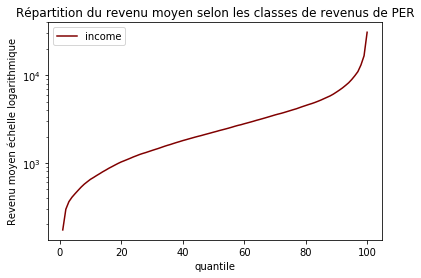

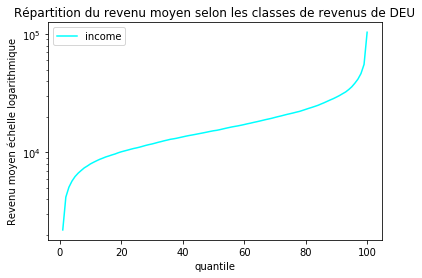

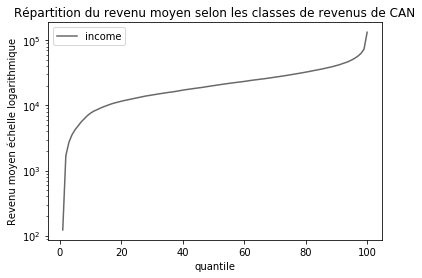

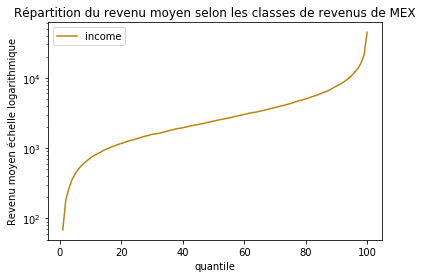

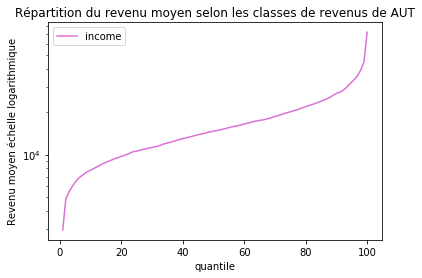

In [28]:
i = 0
for pays in liste_pays_a_analyser:
    analys = data_analyse_2008[data_analyse_2008['country'] == pays]
    analys.plot(x='quantile',y='income',color=liste_couleurs[i])
    plt.yscale('log')
    plt.ylabel('Revenu moyen échelle logarithmique')
    plt.title('Répartition du revenu moyen selon les classes de revenus de {}'.format(pays))
    i = i+ 1


## Représentez la courbe de Lorenz de chacun des pays choisis.

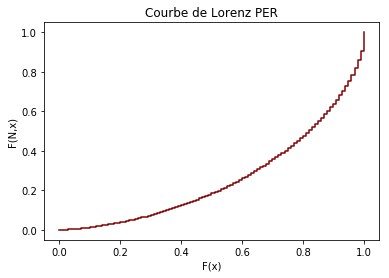

L'indice de gini est 0.49


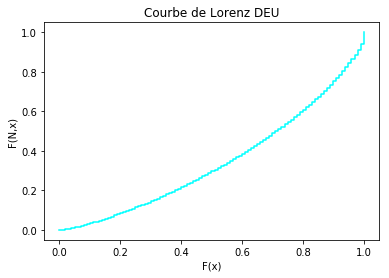

L'indice de gini est 0.32


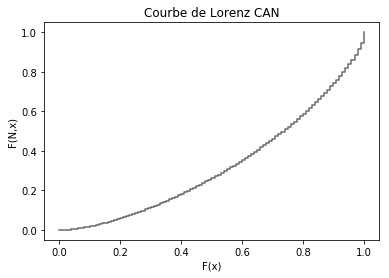

L'indice de gini est 0.37


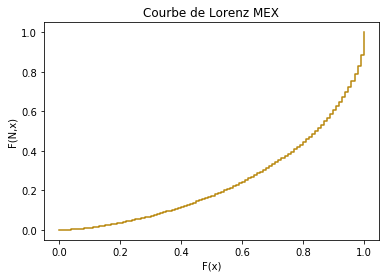

L'indice de gini est 0.52


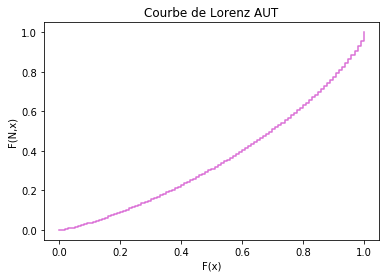

L'indice de gini est 0.3


In [29]:
i = 0
for pays in liste_pays_a_analyser:
    analys = data_analyse_2008[data_analyse_2008['country'] == pays]
    echantillon = analys['income']
    #Sélection du sous-échantillon de travail que l'on appelle  revenus
    ech = echantillon.values
    #On place les observations dans une variable
    lorenz = np.cumsum(np.sort(ech)) / ech.sum()

    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

    plot_lorenz = plt.figure()
    plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post',color=liste_couleurs[i])
    titre_lorenz = 'Courbe de Lorenz {}'.format(pays)
    plt.title(titre_lorenz)
    ylabel_lorenz = 'F(N,x)'
    plt.ylabel(ylabel_lorenz)
    xlabel_lorenz = 'F(x)'
    plt.xlabel(xlabel_lorenz)


    #Indice de Gini
    aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
    S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
    gini = round(2*S,2)

    plt.show(plot_lorenz)
    print("L'indice de gini est {}".format(gini))
    i = i+ 1

## Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans.

In [30]:
data_indice_gini = pd.read_csv('../fichiers_csv/indice_gini.csv')
data_indice_gini

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,30.0,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United Arab Emirates,ARE,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Argentina,ARG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,44.5,43.9,43.0,42.3,41.2,41.0,41.4,NaN,42.4,NaN
8,Armenia,ARM,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,29.2,28.0,30.0,29.4,29.6,30.6,31.5,32.4,32.5,NaN
9,American Samoa,ASM,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
data_indice_gini.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

In [32]:
data_indice_gini = data_indice_gini[['Country Name','Country Code','2004','2005','2006','2007','2008','2009','2010','2011']]
data_indice_gini.head()

,Country Name,Country Code,2004,2005,2006,2007,2008,2009,2010,2011
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN
3,Albania,ALB,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
i = 0
for pays in liste_pays_a_analyser:
    a = data_indice_gini[data_indice_gini['Country Code'] == pays]
    b = a.pivot_table(columns = 'Country Code')
    b.columns = ['gini']
    b.reset_index(inplace=True)
    b.columns = ['annee','gini']

    source = bk.ColumnDataSource(b) #Le df est converti en source pour le graphique bokeh
    plot = bk.figure(title="Evolution de l'indice de gini {} ".format(pays))#Mise en forme

    plot.line('annee','gini',source=source, color='grey') #Contenu
    plot.xaxis.axis_label = "Periode en année"
    plot.yaxis.axis_label = "Indice de Gini"
    bk.show(plot)

    i = i+ 1

Impution des indices de Gini manquants

In [34]:
i = 0
liste = list()
for annee in nb_annee:
    a = data_avec_nom_pays[data_avec_nom_pays['year_survey'] == annee]
    for pays in liste_pays_a_analyser:
        analys = a[a['country'] == pays]
        echantillon = analys['income']
        #Sélection du sous-échantillon de travail que l'on appelle  revenus
        ech = echantillon.values
        #On place les observations dans une variable
        lorenz = np.cumsum(np.sort(ech)) / ech.sum()

        lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0


        #Indice de Gini
        aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
        S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
        gini = round(2*S,2)
        liste.append(gini)
print(liste)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.49, 0.32, 0.37, 0.52, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


## Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?

In [35]:
data_indice_gini_0 = data_indice_gini.fillna(0)
data_indice_gini_0.head()

,Country Name,Country Code,2004,2005,2006,2007,2008,2009,2010,2011
0,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Angola,AGO,0.0,0.0,0.0,0.0,42.7,0.0,0.0,0.0
3,Albania,ALB,0.0,30.6,0.0,0.0,30.0,0.0,0.0,0.0
4,Andorra,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
for annee in nb_annee:
    classement = data_indice_gini_0.sort_values(by=str(annee),ascending=False)
    classement = classement[['Country Name','Country Code',str(annee)]]
    classement = classement.reset_index(drop=True)
    print(classement.head())
    print(classement[classement['Country Code']== 'FRA'])

  Country Name Country Code  2004
0     Honduras          HND  58.1
1       Brazil          BRA  56.5
2      Comoros          COM  55.9
3      Bolivia          BOL  55.0
4       Panama          PAN  54.9
   Country Name Country Code  2004
50       France          FRA  30.6
  Country Name Country Code  2006
0     Honduras          HND  57.5
1      Bolivia          BOL  56.7
2       Brazil          BRA  55.6
3       Panama          PAN  54.7
4       Zambia          ZMB  54.6
   Country Name Country Code  2006
59       France          FRA  29.7
  Country Name Country Code  2007
0     Honduras          HND  55.8
1       Brazil          BRA  54.9
2      Bolivia          BOL  54.5
3      Ecuador          ECU  53.3
4     Paraguay          PRY  53.0
   Country Name Country Code  2007
43       France          FRA  32.4
               Country Name Country Code  2008
0              South Africa          ZAF  63.0
1  Central African Republic          CAF  56.2
2                  Honduras          

# Mission 3

Sur l'échantillon à votre disposition, réalisez quelques tests statistiques :

    un test de comparaison (test d'homogénéité)
    un test de conformité
    un test d'adéquation


## Un test d'adéquation

Au préalable de notre test de comparaison : Vérifier que nos échantillons suivent une loi normale.

income = Variable continu --> test Kolmogorov-Smirnov

In [40]:
ech_mex = data_analyse_2008[data_analyse_2008['country'] == 'MEX']
ech_mex = ech_mex['income']
ech_can = data_analyse_2008[data_analyse_2008['country'] == 'CAN']
ech_can = ech_can['income']
ech_deu = data_analyse_2008[data_analyse_2008['country'] == 'DEU']
ech_deu = ech_deu['income']
ech_per = data_analyse_2008[data_analyse_2008['country'] == 'PER']
ech_per = ech_per['income']

In [51]:
ks_2samp(ech_mex,list(np.random.normal(np.mean(ech_mex), np.std(ech_mex), 1000)))

Ks_2sampResult(statistic=0.252, pvalue=1.4037088003284792e-05)

Conclusion : P-Valeur = 0.0000140 < 0.05 On rejette H0  et on garde H1 (F différent de F0). La variable PIB par habitant ne suit pas la loi normale.

In [52]:
ks_2samp(ech_can,list(np.random.normal(np.mean(ech_can), np.std(ech_can), 1000)))

Ks_2sampResult(statistic=0.14200000000000002, pvalue=0.046194254619189336)

Conclusion : P-Valeur = 0.05 = 0.05 On rejette H1  et on garde H0 (F = F0). La  variable évolution de la population suit la loi normale.

In [39]:
ks_2samp(ech_deu,list(np.random.normal(np.mean(ech_deu), np.std(ech_deu), 1000)))

Ks_2sampResult(statistic=0.151, pvalue=0.028221675572951698)

Conclusion : P-Valeur = 0.03 < 0.05 On rejette H0  et on garde H1 (F différent de F0). La variable PIB par habitant ne suit pas la loi normale.

In [41]:
ks_2samp(ech_per,list(np.random.normal(np.mean(ech_per), np.std(ech_per), 1000)))

Ks_2sampResult(statistic=0.19799999999999998, pvalue=0.0013163651450591204)

Conclusion : P-Valeur = 0.001 < 0.05 On rejette H0  et on garde H1 (F différent de F0). La variable PIB par habitant ne suit pas la loi normale.